## Importing the necessary packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
import os

import folium
from folium.plugins import HeatMap

In [4]:
uber_data_file_janjune_15 = r"D:\5.DataAnalysis\2\Project 1..Uber New York Trip-20230330T114642Z-001\Project 1..Uber New York Trip\uber-pickups-in-new-york-city\uber-raw-data-janjune-15.csv"
uber_data_janjune_15 = pd.read_csv(uber_data_file_janjune_15)
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
uber_data_janjune_15.shape

(14270479, 4)

### Checking for duplicated data

In [6]:
uber_data_janjune_15.duplicated().sum()

898225

### Removing the duplicated data

In [8]:
uber_data_janjune_15.drop_duplicates(inplace=True)

In [9]:
uber_data_janjune_15.shape

(13372254, 4)

In [10]:
uber_data_janjune_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

### Changing the time and date to datetime64[ns]

In [11]:
uber_data_janjune_15['Pickup_date'] = pd.to_datetime(uber_data_janjune_15['Pickup_date'] , format='%Y-%m-%d %H:%M:%S' )

In [12]:
uber_data_janjune_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

### 1- Finding the month with the maximum Uber pickups for this set of data

In [13]:
uber_data_janjune_15['month'] =uber_data_janjune_15['Pickup_date'].dt.strftime('%B')

In [15]:
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-17 09:47:00,B02617,141,May
1,B02617,2015-05-17 09:47:00,B02617,65,May
2,B02617,2015-05-17 09:47:00,B02617,100,May
3,B02617,2015-05-17 09:47:00,B02774,80,May
4,B02617,2015-05-17 09:47:00,B02617,90,May


In [16]:
uber_data_janjune_15['month'].value_counts()

June        2571771
May         2483980
February    2222189
April       2112705
March       2062639
January     1918970
Name: month, dtype: int64

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
pd.Categorical(uber_data_janjune_15['month'], categories=month_order, ordered=True)
uber_data_janjune_15['month'] = pd.Categorical(uber_data_janjune_15['month'], categories=month_order, ordered=True)

In [24]:
monthly_data_janjune_15= uber_data_janjune_15.groupby(['month']).size().reset_index(name='count')

In [29]:
monthly_data_janjune_15

,month,count
0,January,1918970
1,February,2222189
2,March,2062639
3,April,2112705
4,May,2483980
5,June,2571771


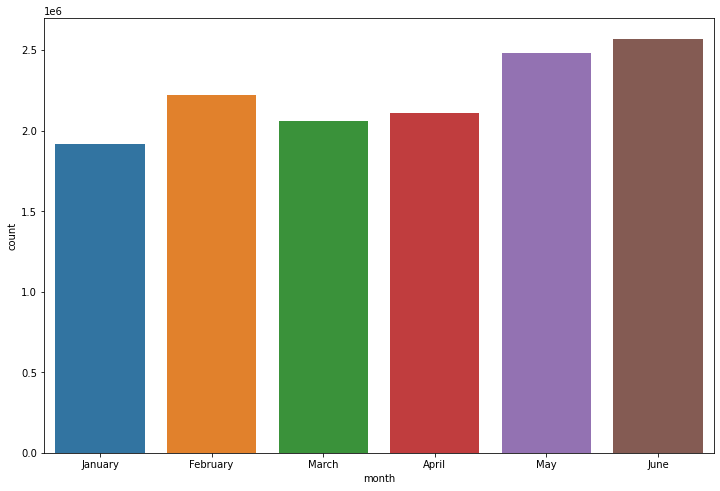

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x='month' , y='count', data=monthly_data_janjune_15)
plt.show()

In [66]:
max_row = monthly_data_janjune_15.loc[monthly_data_janjune_15['count'].idxmax()]
max_row

month       June
count    2571771
Name: 5, dtype: object

### 2-Total trips for each month and each day

In [31]:
uber_data_janjune_15['weekdays'] = uber_data_janjune_15['Pickup_date'].dt.day_name()

In [32]:
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekdays
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday


In [35]:
uber_data_janjune_15.groupby(['month','weekdays']).size().reset_index(name='count').head(10)

,month,weekdays,count
0,January,Friday,339285
1,January,Monday,190606
2,January,Saturday,386049
3,January,Sunday,230487
4,January,Thursday,330319
5,January,Tuesday,196574
6,January,Wednesday,245650
7,February,Friday,373550
8,February,Monday,274948
9,February,Saturday,368311


In [41]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pd.Categorical(uber_data_janjune_15['weekdays'], categories=weekdays_order, ordered=True)
m_and_d_data_janjune_15=uber_data_janjune_15.groupby(['month','weekdays']).size().reset_index(name='count')

In [46]:
m_and_d_data_janjune_15.head()

,month,weekdays,count
0,January,Friday,339285
1,January,Monday,190606
2,January,Saturday,386049
3,January,Sunday,230487
4,January,Thursday,330319


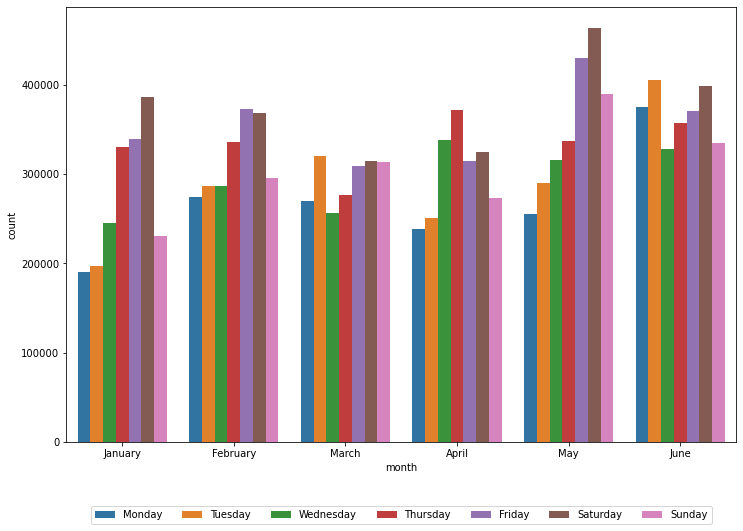

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x='month' , y='count' , hue ='weekdays', data=m_and_d_data_janjune_15 ,hue_order = weekdays_order )
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=11)
plt.show()

In [64]:
max_row = m_and_d_data_janjune_15.loc[m_and_d_data_janjune_15['count'].idxmax()]
max_row

month            May
weekdays    Saturday
count         464298
Name: 30, dtype: object

### 3-Finding the hourly rush in NY city in all days and in each day
#### 3.1 in all days

In [71]:
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekdays
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday


In [72]:
uber_data_janjune_15['hour'] =uber_data_janjune_15['Pickup_date'].dt.hour

In [73]:
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekdays,hour
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,9
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,9
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,9
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,9
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,9


In [76]:
h_data_janjune_15=uber_data_janjune_15.groupby(['hour']).size().reset_index(name='count')
h_data_janjune_15

,hour,count
0,0,557302
1,1,368383
2,2,246387
3,3,176216
4,4,168058
5,5,189086
6,6,279978
7,7,426073
8,8,555338
9,9,564992


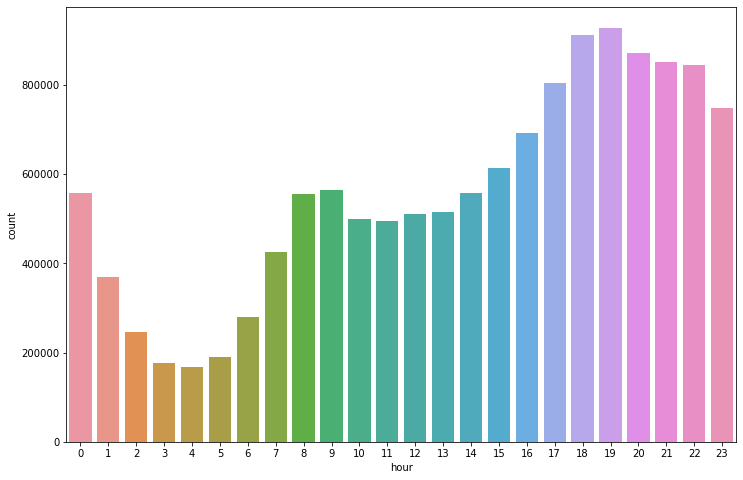

In [78]:
plt.figure(figsize=(12,8))
sns.barplot(x='hour' , y='count', data=h_data_janjune_15 )
plt.show()


#### 3.2 in each day

In [80]:
uber_data_janjune_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekdays,hour
0,B02617,2015-05-17 09:47:00,B02617,141,May,Sunday,9
1,B02617,2015-05-17 09:47:00,B02617,65,May,Sunday,9
2,B02617,2015-05-17 09:47:00,B02617,100,May,Sunday,9
3,B02617,2015-05-17 09:47:00,B02774,80,May,Sunday,9
4,B02617,2015-05-17 09:47:00,B02617,90,May,Sunday,9


In [84]:
h_in_d_data_janjune_15=uber_data_janjune_15.groupby(['hour','weekdays']).size().reset_index(name='count')
h_in_d_data_janjune_15

,hour,weekdays,count
0,0,Monday,47608
1,0,Tuesday,42659
2,0,Wednesday,49928
3,0,Thursday,63000
4,0,Friday,79879
...,...,...,...
163,23,Wednesday,91631
164,23,Thursday,119432
165,23,Friday,152707
166,23,Saturday,159778


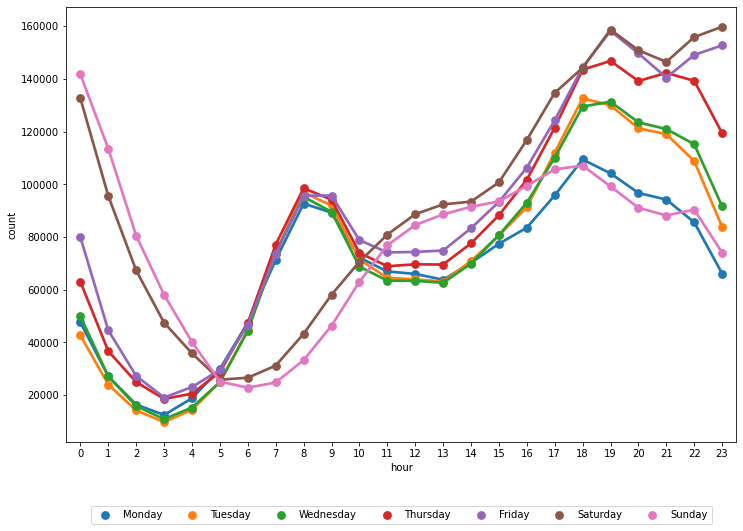

In [91]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour', y='count' , hue='weekdays', data=h_in_d_data_janjune_15)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=11)
plt.show()


In [92]:
h_in_d_data_janjune_15.loc[h_in_d_data_janjune_15['count'].idxmax]

hour              23
weekdays    Saturday
count         159778
Name: 166, dtype: object

### 4-Which Base Number has the most Active Vechiles 

#### in the current df we don't have anything related to the Active Vechiles, thus we need to import another df

In [105]:
file_FOIL = r"D:\5.DataAnalysis\2\Project 1..Uber New York Trip-20230330T114642Z-001\Project 1..Uber New York Trip\uber-pickups-in-new-york-city\Uber-Jan-Feb-FOIL.csv"
uber_data_FOIL = pd.read_csv(file_FOIL)
uber_data_FOIL.head(10)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
5,B02598,1/1/2015,870,6903
6,B02598,1/2/2015,785,4768
7,B02617,1/2/2015,1137,7065
8,B02512,1/2/2015,175,875
9,B02682,1/2/2015,890,5506


In [96]:
uber_data_FOIL.groupby(['dispatching_base_number']).size().reset_index(name='count')

,dispatching_base_number,count
0,B02512,59
1,B02598,59
2,B02617,59
3,B02682,59
4,B02764,59
5,B02765,59


In [100]:
base_number = uber_data_FOIL.groupby(['dispatching_base_number'])['active_vehicles'].sum().reset_index(name='sum')
base_number

,dispatching_base_number,sum
0,B02512,13125
1,B02598,58653
2,B02617,79758
3,B02682,71431
4,B02764,217290
5,B02765,22575


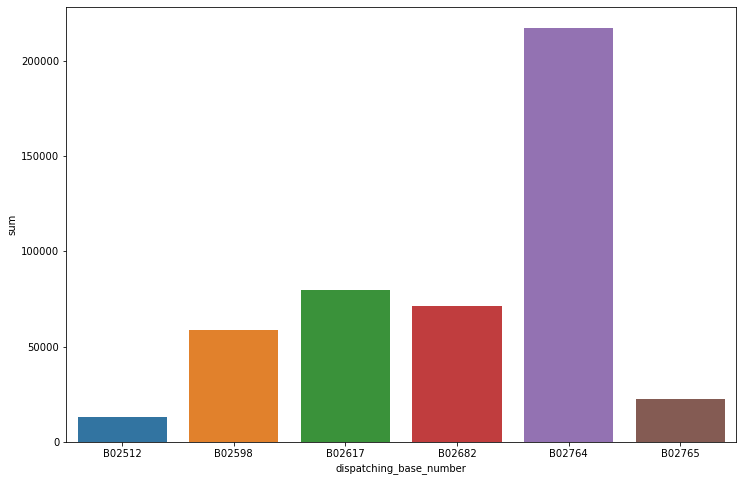

In [103]:
plt.figure(figsize=(12,8))
sns.barplot(x='dispatching_base_number' , y='sum', data=base_number)
plt.show()

#### The five summary statistics for each dispatching_base_number

In [ ]:
px.box(x='dispatching_base_number' , y='active_vehicles' , data_frame = uber_data_FOIL)

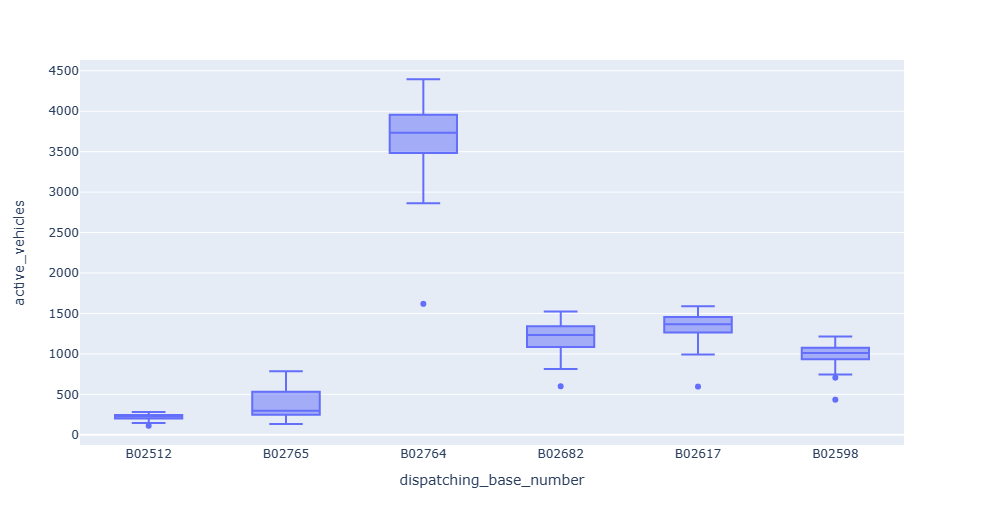

In [ ]:
px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame = uber_data_FOIL)

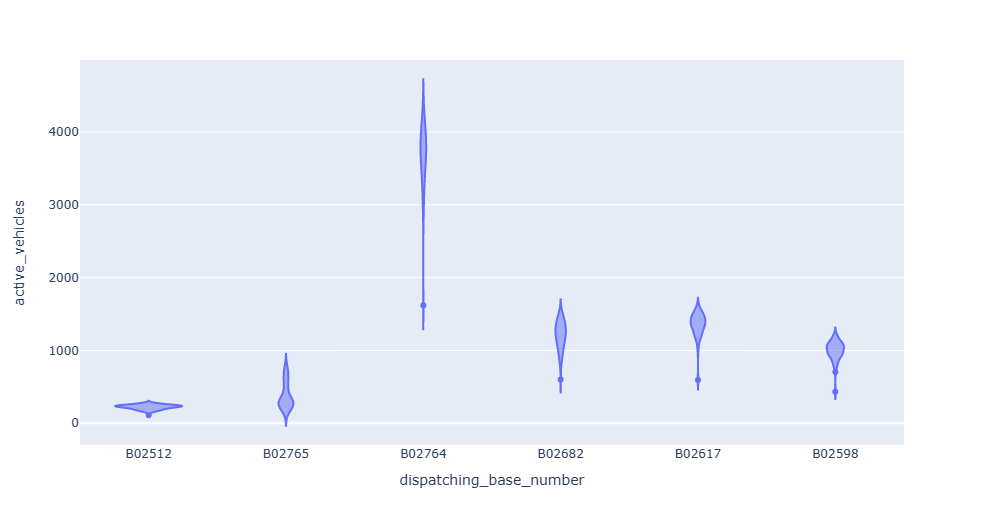

## Now will be working with new data, for the months april to september 2014
### all the data are availabe but in different excel files, we need to merge them first

In [107]:
os.listdir(r'D:\5.DataAnalysis\2\Project 1..Uber New York Trip-20230330T114642Z-001\Project 1..Uber New York Trip\uber-pickups-in-new-york-city')

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [108]:
files =os.listdir(r'D:\5.DataAnalysis\2\Project 1..Uber New York Trip-20230330T114642Z-001\Project 1..Uber New York Trip\uber-pickups-in-new-york-city')[-7:]

In [109]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [110]:
files.remove('uber-raw-data-janjune-15.csv')

In [111]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [166]:
path=r'D:\5.DataAnalysis\2\Project 1..Uber New York Trip-20230330T114642Z-001\Project 1..Uber New York Trip\uber-pickups-in-new-york-city'
final_df = pd.DataFrame()
for file in files:
    current_df= pd.read_csv(path+ '/' + file , encoding='utf-8')
    final_df = pd.concat([current_df,final_df])

In [167]:
final_df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [168]:
final_df.duplicated().sum()

82581

In [169]:
final_df.drop_duplicates(inplace=True)

In [170]:
final_df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


### 5- Creat a heatmap showing what locations in NY City are getting a rush 
#### 5.1- Overall

In [122]:
locations= final_df.groupby(['Lat','Lon']).size().reset_index(name='count')
locations

,Lat,Lon,count
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [ ]:
base_map = folium.Map()
HeatMap(locations)
HeatMap(locations).add_to(base_map)
base_map

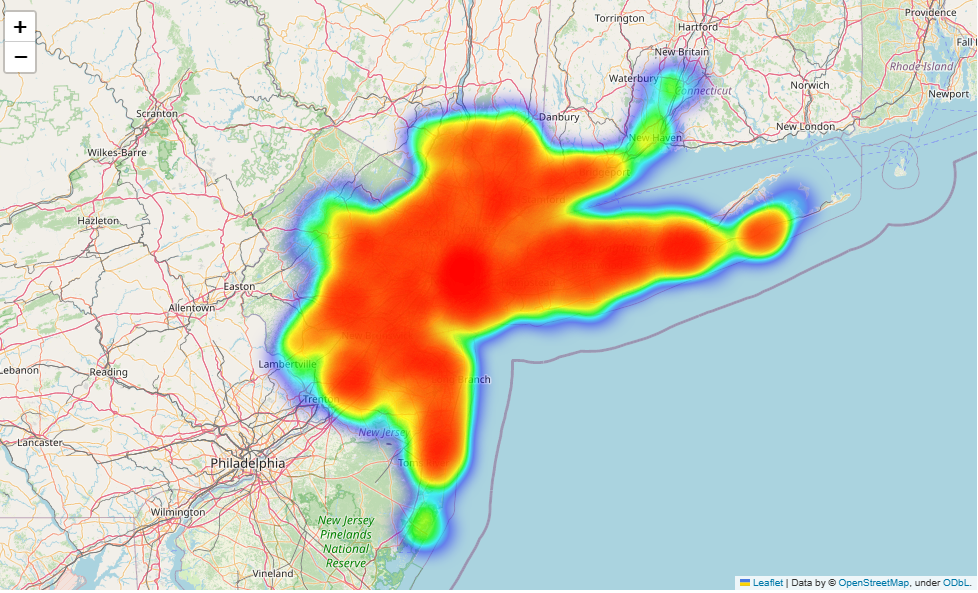

#### 5.2 - The weekends

In [171]:
final_df

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [172]:
final_df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [173]:
final_df['Date/Time']=pd.to_datetime(final_df['Date/Time'] , format='%m/%d/%Y %H:%M:%S' )

In [174]:
final_df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [175]:
final_df['weekdays'] = final_df['Date/Time'].dt.day_name()

In [176]:
final_df['weekend'] = final_df['weekdays'].isin(['Saturday', 'Sunday'])

In [177]:
final_df

,Date/Time,Lat,Lon,Base,weekdays,weekend
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,False
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,False
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,False
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,False
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,False
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,False
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,False
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,False
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,False


In [180]:
final_df_weekends = final_df[final_df['weekend']]

In [181]:
final_df_weekends

,Date/Time,Lat,Lon,Base,weekdays,weekend
6431,2014-09-06 00:00:00,40.7619,-73.9654,B02512,Saturday,True
6432,2014-09-06 00:00:00,40.7273,-73.9921,B02512,Saturday,True
6433,2014-09-06 00:00:00,40.7385,-73.9898,B02512,Saturday,True
6434,2014-09-06 00:01:00,40.7320,-74.0009,B02512,Saturday,True
6435,2014-09-06 00:01:00,40.7395,-73.9928,B02512,Saturday,True
...,...,...,...,...,...,...
563273,2014-04-27 22:59:00,40.7741,-73.8725,B02764,Sunday,True
563274,2014-04-27 23:23:00,40.7782,-73.9625,B02764,Sunday,True
563275,2014-04-27 23:33:00,40.6449,-73.7823,B02764,Sunday,True
563276,2014-04-27 23:35:00,40.7278,-73.9822,B02764,Sunday,True


In [182]:
final_df_weekends.rename(columns={'weekdays' : 'weekends'} , inplace=True)
final_df_weekends

C:\Users\fouad\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date/Time,Lat,Lon,Base,weekends,weekend
6431,2014-09-06 00:00:00,40.7619,-73.9654,B02512,Saturday,True
6432,2014-09-06 00:00:00,40.7273,-73.9921,B02512,Saturday,True
6433,2014-09-06 00:00:00,40.7385,-73.9898,B02512,Saturday,True
6434,2014-09-06 00:01:00,40.7320,-74.0009,B02512,Saturday,True
6435,2014-09-06 00:01:00,40.7395,-73.9928,B02512,Saturday,True
...,...,...,...,...,...,...
563273,2014-04-27 22:59:00,40.7741,-73.8725,B02764,Sunday,True
563274,2014-04-27 23:23:00,40.7782,-73.9625,B02764,Sunday,True
563275,2014-04-27 23:33:00,40.6449,-73.7823,B02764,Sunday,True
563276,2014-04-27 23:35:00,40.7278,-73.9822,B02764,Sunday,True


In [183]:
final_df_weekends= final_df_weekends.drop(['weekend'] , axis =1)

In [184]:
final_df_weekends

,Date/Time,Lat,Lon,Base,weekends
6431,2014-09-06 00:00:00,40.7619,-73.9654,B02512,Saturday
6432,2014-09-06 00:00:00,40.7273,-73.9921,B02512,Saturday
6433,2014-09-06 00:00:00,40.7385,-73.9898,B02512,Saturday
6434,2014-09-06 00:01:00,40.7320,-74.0009,B02512,Saturday
6435,2014-09-06 00:01:00,40.7395,-73.9928,B02512,Saturday
...,...,...,...,...,...
563273,2014-04-27 22:59:00,40.7741,-73.8725,B02764,Sunday
563274,2014-04-27 23:23:00,40.7782,-73.9625,B02764,Sunday
563275,2014-04-27 23:33:00,40.6449,-73.7823,B02764,Sunday
563276,2014-04-27 23:35:00,40.7278,-73.9822,B02764,Sunday


In [191]:
Locations_weekends= final_df_weekends.groupby(['Lat','Lon']).size().reset_index(name='count')
Locations_weekends

,Lat,Lon,count
0,39.6686,-74.1607,1
1,39.7214,-74.2446,1
2,39.8416,-74.1512,1
3,39.9055,-74.0791,1
4,39.9196,-74.1112,1
...,...,...,...
334970,41.3195,-73.6903,1
334971,41.3197,-73.6903,1
334972,41.3199,-73.9901,1
334973,41.3199,-73.6902,1


In [187]:
base_map_weekends=folium.Map()

In [ ]:
HeatMap(Locations_weekends)
HeatMap(Locations_weekends).add_to(base_map_weekends)
base_map_weekends

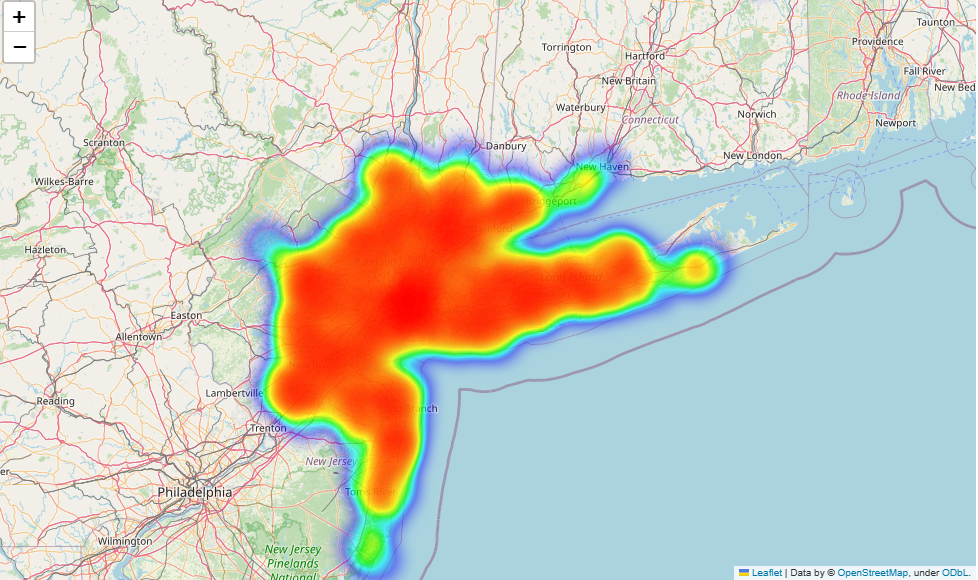

### 6- Extreme rush hour and weekday (Pairwise analysis)

In [195]:
final_df.head()

,Date/Time,Lat,Lon,Base,weekdays,weekend
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,False
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,False
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,False
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,False
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,False


In [196]:
final_df['hour'] = final_df['Date/Time'].dt.hour

In [198]:
final_df

,Date/Time,Lat,Lon,Base,weekdays,weekend,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,False,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,False,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,False,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,False,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,False,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,False,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,False,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,False,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,False,23


In [200]:
final_df.groupby(['weekdays' , 'hour']).size().reset_index(name='count')

,weekdays,hour,count
0,Friday,0,13447
1,Friday,1,8002
2,Friday,2,5232
3,Friday,3,6788
4,Friday,4,8641
...,...,...,...
163,Wednesday,19,46096
164,Wednesday,20,46875
165,Wednesday,21,43754
166,Wednesday,22,32222


In [207]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pd.Categorical( final_df['weekdays'], categories=weekdays_order, ordered=True)
final_df['weekdays']=pd.Categorical( final_df['weekdays'], categories=weekdays_order, ordered=True)
final_df.groupby(['weekdays' , 'hour']).size().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
Monday,6327,3679,2885,6106,9460,14737,23285,30650,28764,21854,...,27696,32201,38149,41351,36359,33512,32279,28401,19805,11588
Tuesday,6116,3437,2502,4394,7404,13938,26361,35935,33304,24591,...,34234,40641,47849,54483,49258,43954,43875,39224,27211,14599
Wednesday,7499,4233,3060,4762,7379,13542,26462,35810,33231,25195,...,34512,42606,49764,54584,51732,46096,46875,43754,32222,17803
Thursday,9116,5169,3629,5532,8355,13889,26561,36393,34856,27376,...,36048,43604,49615,55645,54768,50927,51044,50938,43381,27203
Friday,13447,8002,5232,6788,8641,13168,22988,31522,30926,24803,...,35569,42910,47315,50997,53746,48657,42713,47389,48471,40498
Saturday,27096,18783,12464,9356,6746,6990,8450,10831,14176,17384,...,30851,38104,42735,42013,44995,40271,37922,42938,47107,42388
Sunday,32275,22610,15126,10393,6261,6086,6492,8584,11909,16113,...,27603,30570,32383,30951,27726,25419,24601,23539,19227,11998


In [203]:
pivot_table = final_df.groupby(['weekdays' , 'hour']).size().unstack()

In [ ]:
pivot_table.style.background_gradient()

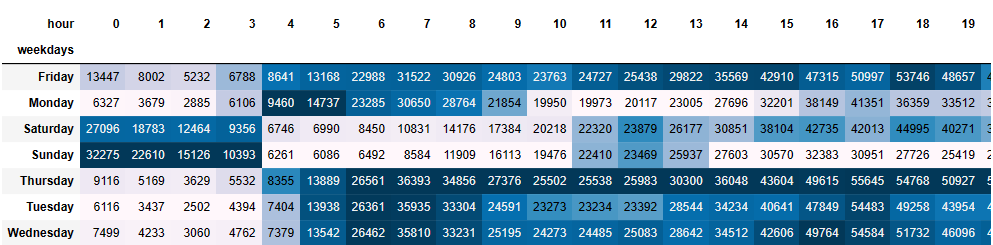

In [209]:
Max_pair= pivot_table.stack().idxmax()
Min_pair= pivot_table.stack().idxmin()

In [210]:
Max_pair

('Thursday', 17)

In [211]:
Min_pair

('Tuesday', 2)